In [ ]:
# https://www.kaggle.com/nicapotato/guided-numeric-and-text-exploration-e-commerce

In [2]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("E:/Kaggle Practice/Womens Clothing E-Commerce Reviews/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
# Age: Positive Integer variable of the reviewers age.
# Title: String variable for the title of the review.
# Review Text: String variable for the review body.
# Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
# Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
# Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
# Division Name: Categorical name of the product high level division.
# Department Name: Categorical name of the product department name.
# Class Name: Categorical name of the product class name.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
#Code Explanation and Reasoning:
#These packages are separated in four categories: General, Visualization, Pre-Processing, and Modeling.

# The General category includes the basic data manipulation tools for scientific computation (numpy), dataframes (pandas), Natural Language Processing (NLTK), path directory manipulation (os), and image saving (PIL).

# The Visualization section enables the creation of simple graphics (matplotlib, seaborn), as well as wordcloud's text frequency visualization.

# The Pre-Processing section extracts more specialized modules from the NLTK package such as tokenizers and stemmers to enable the preparation of text data for mathematical analysis.

# The Modeling section includes nltk’s sentiment analysis module, which can determine the mood of text, NLTK’s N-grams, and gensim.models’s word2vec. It also includes statsmodels.api which offers an array of linear models.

In [6]:
df.drop(df.columns[0],inplace=True, axis=1)
# 인덱스 컬럼은 드롭. inplace=True는 df에 바로 적용하는거고, axis=1은 컬럼을 의미하므로 컬럼[0]을 드롭하는데 바로 적용하라는 뜻

# Delete missing observations for following variables
for x in "Division Name","Department Name","Class Name","Review Text":
    df = df[df[x].notnull()]
# 이 데이터셋에는 "Title","Division Name","Department Name","Class Name","Review Text" 5가지의 컬럼에 missing value가 있는데
# 리뷰에서 "Review Text"가 중요하므로 리뷰가 없으면 삭제하고 "Title"은 큰 의미가 없기때문에 냅두고, 나머지 3개의 컬럼에서
# missig value가 있으면 삭제한다
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22628 non-null  int64 
 1   Age                      22628 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              22628 non-null  object
 4   Rating                   22628 non-null  int64 
 5   Recommended IND          22628 non-null  int64 
 6   Positive Feedback Count  22628 non-null  int64 
 7   Division Name            22628 non-null  object
 8   Department Name          22628 non-null  object
 9   Class Name               22628 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [7]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [8]:
# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])
unique_count

[['Clothing ID', 1172, 0],
 ['Age', 77, 0],
 ['Title', 13984, 2966],
 ['Review Text', 22621, 0],
 ['Rating', 5, 0],
 ['Recommended IND', 2, 0],
 ['Positive Feedback Count', 82, 0],
 ['Division Name', 3, 0],
 ['Department Name', 6, 0],
 ['Class Name', 20, 0]]

In [9]:
# Missing Values
print("Missing Values: {}".format(df.isnull().sum().sum()))

Missing Values: 2966


In [10]:
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))

Dataframe Dimension: 22628 Rows, 10 Columns


In [11]:
# Create New Variables:
# Word Length 
df["Word Count"] = df['Review Text'].str.split().apply(len)

# Character Length
df["Character Count"] = df["Review Text"].apply(len)

# Boolean for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating >= 3, ["Label"]] = 1

In [12]:
df.sample(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Character Count,Label
11069,1086,53,Love this!!!,Tried it on at the store. (must of been a retu...,5,1,4,General,Dresses,Dresses,103,500,1
8534,964,62,Amazing!,"Absolutely love this jacket - soft, nice amoun...",5,1,0,General Petite,Jackets,Jackets,44,238,1
10604,838,32,This product has a cute design and nice fabric.,This layered top fits true to size. the style ...,5,1,8,General,Tops,Blouses,35,179,1


## Univariate Distribution
### To start off my analysis, I will first take a look at the distribution of individual variables. This is a good way to see what I am up against, and understand the context of the subsequent multi-variate analysis.

In [13]:
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))

Dataframe Dimension: 22628 Rows, 13 Columns


In [14]:
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Column,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Unique,1172,77,13984,22621,5,2,82,3,6,20
Missing,0,0,2966,0,0,0,0,0,0,0


## Interpretation
### There are approximately 3000 missing values, which represents 1% of the dataset, but the dataset will not get trimmed further since the review text body is the only variable that must be complete.

### Amongst the categorical variables, the high unique count of Clothing ID and Class Names will require non-visual exploratory methods.

In [15]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Word Count,Character Count,Label
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764,2.631784,60.211950,308.761534,0.895263
std,201.683804,12.328176,1.115911,0.385222,5.787520,28.533053,143.934126,0.306222
min,1.000000,18.000000,1.000000,0.000000,0.000000,2.000000,9.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,36.000000,186.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,59.000000,302.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,88.000000,459.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,115.000000,508.000000,1.000000


In [16]:
df.describe().T 
# 위의 결과랑 가로, 세로가 바뀜

,count,mean,std,min,25%,50%,75%,max
Clothing ID,22628.0,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,22628.0,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,22628.0,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,22628.0,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,22628.0,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Word Count,22628.0,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0
Character Count,22628.0,308.761534,143.934126,9.0,186.0,302.0,459.0,508.0
Label,22628.0,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0


In [17]:
df.describe().T.drop("count",axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0
Character Count,308.761534,143.934126,9.0,186.0,302.0,459.0,508.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0


In [18]:
df.describe(include=["O"]).T
# df.describe().T 이렇게 출력하면 숫자형 자료들의 mean, min, max 등이 출력되는데
# df.describe(include=["O"]).T 이렇게 include=["O"] 을 넣어서 출력하면 
# categorical(문자형) 데이터들의 unique, top, freq의 정보가 출력된다.

,count,unique,top,freq
Title,19662,13983,Love it!,136
Review Text,22628,22621,Perfect fit and i've gotten so many compliment...,3
Division Name,22628,3,General,13365
Department Name,22628,6,Tops,10048
Class Name,22628,20,Dresses,6145


In [19]:
df[["Title", "Division Name", "Department Name", "Class Name"]].describe().T.drop("count",axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


In [ ]:
# Just an overview. I want to explore these numbers using visualizations.

### Age and Positive Feedback Count Distributions:

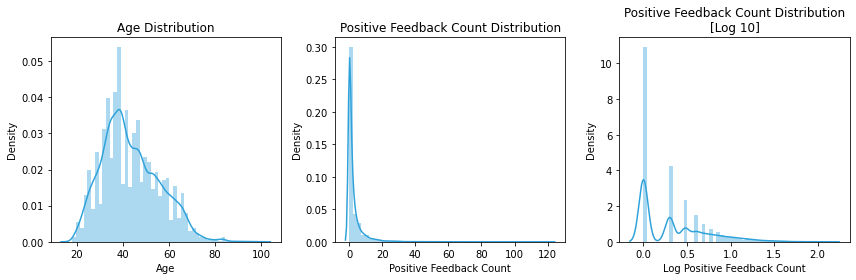

In [20]:
# Continuous Distributions

f, ax = plt.subplots(1,3,figsize=(12,4), sharey=False)
# 여기서 1,3 은 
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.distplot(df["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.distplot(np.log10((df["Positive Feedback Count"][df["Positive Feedback Count"].notnull()]+1)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")
plt.tight_layout()
plt.show()

In [ ]:
# Code Explanation:
#Using seaborn, a simple variable frequency bar/density plot is created. In the log positive feedback count plot, I had to add 0.0001 to all values so that the logarithm of previously zero values can be taken. Matplotlib's subplots function is employed through assign each plot the AX argument.

# Distribution of Age:
# My a priori expectation was that the biggest group of reviewing customers would be young, tech savvy women between the age of 18 and 34. However, this plot would say otherwise, since it appears that not only is the 34 to 50 year old age most engage in reviewing products, they also appear to be the most positive reviewers, since they proportionately give higher more reviews of 5. Before making insight about these point, it would be wise to gather further data on the age distribution of shoppers. Nevertheless, this trend suggest that the core market segment for this clothing brand is women between 34 and 50. With its single peak and slight right tail, the distribution of age is more or less normal.

# Distribution of Positive Feedback Count:
# This kind of distribution is common for network effect phenomenon, where popularity has an exponential effect on response, and most individuals receive no attention. This phenomenon is also known as the Cumulative-Advantage Effect / Matthew Effect or the Pareto Principle.

# Cumulative-Advantage Effect / Matthew Effect:
#Coined by Robert K. Merton in 1968, this states that once a social agent gains a small advantage over other agents, that advantage will compound over time into an increasingly larger advantage. Here is the passage from the New Testament:

#"For to everyone who has will more be given, and he will have abundance; but from him who has not, even what he has will be taken away." Matthew 25:29

#This tendency effects any system with a positive feedback loop, which compounds. This effect turns out to be quite common among competing agents, and what we end up with, is a the Pareto Distribution.

# Pareto Distribution:
# Also known as the 80/20 rule. Often used to describe the distribution of wealth, 20% of the population hold 80% of the wealth. I wonder how accurate this rule of thumb applies to the distribution of Positive Feedback.

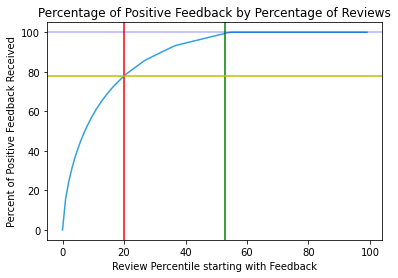

78.0% of Positive Feedback belongs to the top 20% of Reviewers

Gini Coefficient: 0.76


In [21]:
# Percentage Accumulation from "Most Wealthy"
def percentage_accumulation(series, percentage):
    return (series.sort_values(ascending=False)[:round(series.shape[0]*(percentage/100))]
            .sum()/series.sum()*100)

# Gini Coefficient- Inequality Score
# The Gini Coefficient is a measure of inequality.
# Source: https://planspace.org/2013/06/21/how-to-calculate-gini-coefficient-from-raw-data-in-python/

def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

# Cumulative Percentage of Positive Feedback assigned Percent of Reviewers (from most wealthy)
inequality = []
for x in list(range(100)):
    inequality.append(percentage_accumulation(df["Positive Feedback Count"], x))

# Generic Matplotlib Plot
plt.plot(inequality)
plt.title("Percentage of Positive Feedback by Percentage of Reviews")
plt.xlabel("Review Percentile starting with Feedback")
plt.ylabel("Percent of Positive Feedback Received")
plt.axvline(x=20, c = "r")
plt.axvline(x=53, c = "g")
plt.axhline(y=78, c = "y")
plt.axhline(y=100, c = "b", alpha=.3)
plt.show()

# 80-20 Rule Confirmation
print("{}% of Positive Feedback belongs to the top 20% of Reviewers".format(round(percentage_accumulation(df["Positive Feedback Count"],20))))

# Gini
print("\nGini Coefficient: {}".format(round(gini(df["Positive Feedback Count"]),2)))

In [ ]:
# Interpretation:
# In this case, the 80/20 rule applies pretty closely. Nevertheless do not take this rule as granted, since sometimes the proportion of inequality may be much higher! Since the Pareto Principle is a power law, it is fundamentally embedded in itself. However, notice the green vertical line, where 47% of reviews received no feedback at all.

# Since I am on the topic of inequaliy, I want to quickly touch the Gini Coefficient.

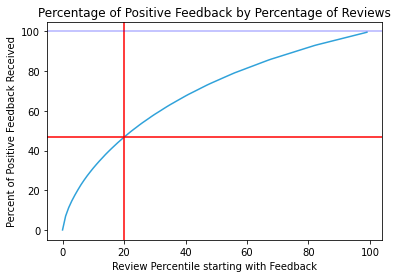

47.0% of Positive Feedback belongs to the top 20% of Reviews

Gini Coefficient: 0.38


In [22]:
# Next, lets see what happens when we look at the top 20% of the top 20%...

# Cumulative Percentage of Positive Feedback assigned Percent of Reviewers (from most wealthy)
top_20 = df["Positive Feedback Count"].sort_values(ascending=False)[:round(df.shape[0]*(20/100))]

inequality = []
for x in list(range(100)):
    inequality.append(percentage_accumulation(top_20, x))

# Generic Matplotlib Plot
plt.plot(inequality)
plt.title("Percentage of Positive Feedback by Percentage of Reviews")
plt.xlabel("Review Percentile starting with Feedback")
plt.ylabel("Percent of Positive Feedback Received")
plt.axvline(x=20, c = "r")
plt.axhline(y=47, c = "r")
plt.axhline(y=100, c = "b", alpha=.3)

plt.show()

# 80-20 Rule Confirmation
print("{}% of Positive Feedback belongs to the top 20% of Reviews".format(
    round(percentage_accumulation(top_20, 20))))

# Gini
print("\nGini Coefficient: {}".format(round(gini(top_20),2)))

In [ ]:
# Interpretation:
# Oh look it didn't hold up. 
# Well think about, the compounding influence of the Network Effect as whole accounts for the sizable portion of the population that receive nothing.

### Division Name and Department Name Distribution:

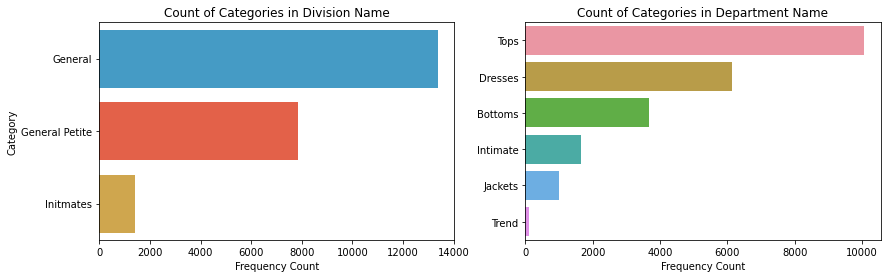

In [23]:
row_plots = ["Division Name", "Department Name"]
f, axes = plt.subplots(1, len(row_plots), figsize=(14,4), sharex=False)
# subplot(nrows, ncols, figsize=(가로길이, 세로길이))

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

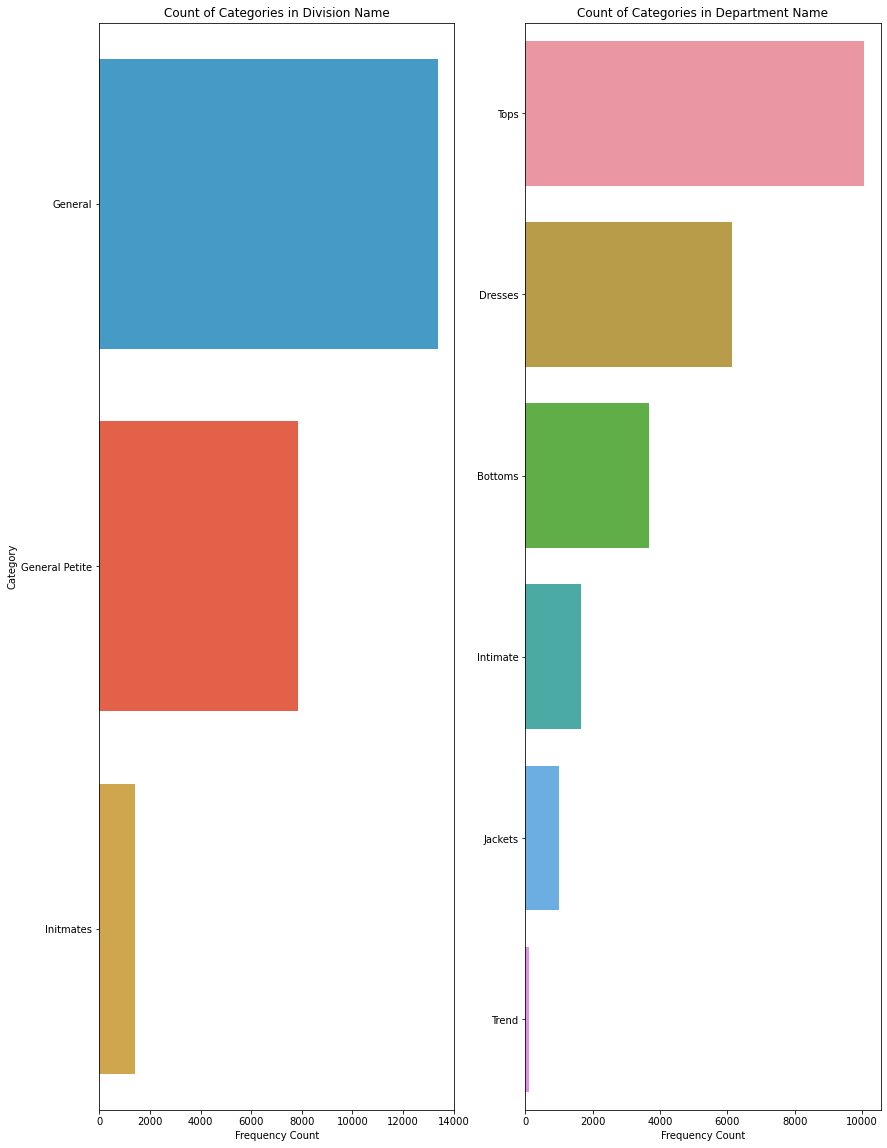

In [24]:
row_plots = ["Division Name", "Department Name"]
f, axes = plt.subplots(1, len(row_plots), figsize=(14,20), sharex=False)
# 위에 figsize=(14,4)와 크기 비교해볼것!

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

In [ ]:
# Code Explanation:
# Enumerating the loop enables the loop iteration to coincide with the matplotlib subplot ax.

# Distribution of Division Name
# This high level feature describes had three categories: General, Petite, and Intimates. 
# This offers some insight into the clothing sizes of the customers leaving reviews.

# Distribution of Department Name
# It is notable to observe that Tops and Dresses are the most commonly reviewed products. 
# It would be interesting to investigate the motivation of leaving a review in the first place.


### Distribution of Clothing ID to Understand Product Popularity

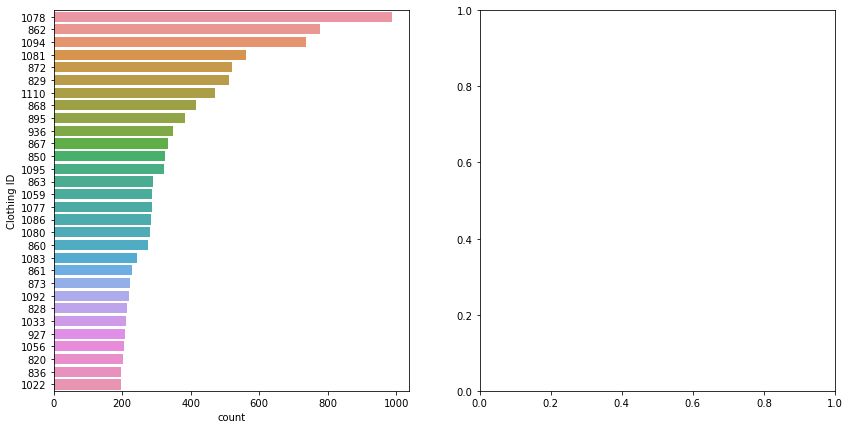

In [25]:
# Clothing ID Category
f, axes = plt.subplots(1,2, figsize =[14,7])
num = 30
sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[:num].index)],
             order = df["Clothing ID"].value_counts()[:num].index, ax=axes[0])
plt.show()